## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [6]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [8]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 11ms/step - loss: 1.9502 - accuracy: 0.2980 - val_loss: 1.8033 - val_accuracy: 0.3493
Epoch 2/100
196/196 [==============================] - 2s 11ms/step - loss: 1.7184 - accuracy: 0.3852 - val_loss: 1.6475 - val_accuracy: 0.4125
Epoch 3/100
196/196 [==============================] - 2s 12ms/step - loss: 1.6335 - accuracy: 0.4163 - val_loss: 1.6089 - val_accuracy: 0.4246
Epoch 4/100
196/196 [==============================] - 2s 11ms/step - loss: 1.5678 - accuracy: 0.4402 - val_loss: 1.5681 - val_accuracy: 0.4449
Epoch 5/100
196/196 [==============================] - 2s 11ms/step - loss: 1.5107 - accuracy: 0.4612 - val_loss: 1.5089 - val_accuracy: 0.4629
Epoch 6/100
196/196 [==============================] - 2s 11ms/step - loss: 1.4770 - accuracy: 0.4721 - val_loss: 1.5160 - val_accuracy: 0.4564
Epoch 7/100
196/196 [==============================] - 2s 11ms/step - loss: 1.4434 - accuracy: 0.4844 - val_loss: 1.5169 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.5749 - accuracy: 0.7958 - val_loss: 1.8852 - val_accuracy: 0.5120
Epoch 58/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5695 - accuracy: 0.7979 - val_loss: 1.9740 - val_accuracy: 0.5137
Epoch 59/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5546 - accuracy: 0.8018 - val_loss: 1.9332 - val_accuracy: 0.5244
Epoch 60/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5453 - accuracy: 0.8049 - val_loss: 2.0469 - val_accuracy: 0.5023
Epoch 61/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5202 - accuracy: 0.8143 - val_loss: 2.0493 - val_accuracy: 0.5001
Epoch 62/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5458 - accuracy: 0.8039 - val_loss: 2.0741 - val_accuracy: 0.5066
Epoch 63/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5357 - accuracy: 0.8094 - val_loss: 2.0316 - val_accuracy: 0.514

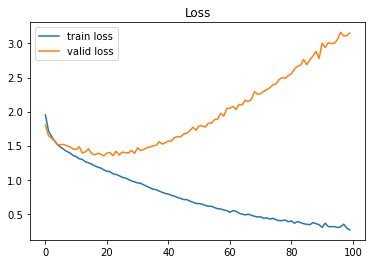

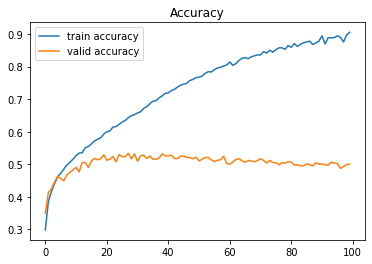

In [14]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢